<a href="https://colab.research.google.com/github/LeeSeungwon89/Kaggle_Dacon_Practice/blob/main/1.%20Porto_Seguro%E2%80%99s_Safe_Driver_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

# 참가한 대회 리스트를 확인합니다.
# !kaggle competitions list

In [ ]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

 98% 75.0M/76.5M [00:00<00:00, 153MB/s]
100% 76.5M/76.5M [00:00<00:00, 135MB/s]


In [ ]:
!ls

kaggle.json  porto-seguro-safe-driver-prediction.zip  sample_data


In [ ]:
!unzip porto-seguro-safe-driver-prediction.zip

Archive:  porto-seguro-safe-driver-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# **1. 데이터 준비**

데이터를 준비하겠습니다.

In [ ]:
import numpy as np
import pandas as pd

# 최대 행렬 수를 설정합니다.
pd.set_option('display.max_column', 100)
pd.set_option('display.max_rows', 100)

# 데이터를 읽습니다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# **2. 데이터 확인**

## **2.1. 데이터 개요**

### **2.1.1. train**

In [ ]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


레코드 순서와 피처 'id'의 값은 순차적으로 일치하지 않습니다. 인덱스로 삼을 수 없는 고윳값입니다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

일견 결측치는 없어보이지만 대회 사이트의 데이터 설명란을 보면 결측치를 -1로 채웠다고 설명합니다. 훈련 및 테스트 세트 모두에 해당합니다. 결측치가 포함된 피처와 결측치 개수는 아래 **2. 피처 확인** 파트에서 상세히 확인해 보겠습니다.

In [ ]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

### **2.1.2. test**

In [ ]:
test

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,1488022,0,1,6,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0.5,0.3,1.048809,0,1,-1,8,0,14,0,1,0,1,18,2,0.565685,1.528774,0.565685,3.605551,0.3,0.4,0.9,1,1,7,3,10,3,10,4,2,3,4,0,1,0,0,1,0
892812,1488023,5,3,5,1,0,0,0,1,0,0,0,0,0,0,11,1,0,0,0.7,1.0,1.246495,8,1,-1,0,0,10,1,0,0,1,83,2,0.424264,1.040567,0.418569,3.741657,0.3,0.2,0.6,1,3,7,3,10,4,9,6,2,2,11,0,0,1,1,0,0
892813,1488024,0,1,5,0,0,1,0,0,0,0,0,0,0,0,5,0,0,1,0.4,0.0,0.609303,11,1,-1,0,-1,11,1,0,1,1,17,2,0.374166,0.968992,0.390384,3.741657,0.3,0.3,0.9,2,1,10,4,8,2,8,5,2,2,11,0,1,1,0,0,0
892814,1488025,6,1,5,1,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.6,0.6,0.920937,10,0,-1,0,1,10,1,1,0,1,28,3,0.387298,0.725125,0.378153,2.645751,0.1,0.1,0.3,1,1,9,2,10,1,8,1,1,2,7,1,1,0,0,0,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              892816 non-null  int64  
 1   ps_ind_01       892816 non-null  int64  
 2   ps_ind_02_cat   892816 non-null  int64  
 3   ps_ind_03       892816 non-null  int64  
 4   ps_ind_04_cat   892816 non-null  int64  
 5   ps_ind_05_cat   892816 non-null  int64  
 6   ps_ind_06_bin   892816 non-null  int64  
 7   ps_ind_07_bin   892816 non-null  int64  
 8   ps_ind_08_bin   892816 non-null  int64  
 9   ps_ind_09_bin   892816 non-null  int64  
 10  ps_ind_10_bin   892816 non-null  int64  
 11  ps_ind_11_bin   892816 non-null  int64  
 12  ps_ind_12_bin   892816 non-null  int64  
 13  ps_ind_13_bin   892816 non-null  int64  
 14  ps_ind_14       892816 non-null  int64  
 15  ps_ind_15       892816 non-null  int64  
 16  ps_ind_16_bin   892816 non-null  int64  
 17  ps_ind_17_

In [ ]:
test.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,8.928160e+05,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.00000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,7.441535e+05,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,0.000373,0.001595,0.009376,0.001039,0.012383,7.296862,0.660591,0.120399,0.154973,0.611057,0.439868,0.551740,8.292038,0.82994,-0.504895,0.725798,-0.158449,6.564297,0.910144,0.832311,1.327911,0.992134,62.284293,2.346606,0.379957,0.813637,0.276431,3.068325,0.449632,0.450453,0.450054,2.371390,1.885328,7.687805,3.009537,9.225854,2.338538,8.443167,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,4.296830e+05,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,0.019309,0.039905,0.096375,0.032223,0.127251,3.541948,0.473509,0.325428,0.361879,0.287699,0.404678,0.794023,2.508331,0.37570,0.788753,2.154886,0.844566,5.500485,0.347283,0.373590,0.978741,0.091530,33.003714,0.831666,0.058385,0.224779,0.356835,0.729005,0.287213,0.287373,0.287254,1.116953,1.136763,1.333521,1.415155,1.460560,1.248601,2.906361,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,0.141421,0.275778,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720218e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.524404,7.000000,1.00000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.671234,0.333916,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.443070e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.721110,7.000000,1.00000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.7660

테스트 세트 크기가 훈련 세트 크기보다 큽니다.

### **2.1.3 submission**

In [ ]:
submission

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364
...,...,...
892811,1488022,0.0364
892812,1488023,0.0364
892813,1488024,0.0364
892814,1488025,0.0364


이진분류 문제지만 타깃값은 소수입니다. 타깃값이 1일 확률값을 나타내는 것으로 보입니다. 이 값과 같은 형식으로 값을 구성해야 합니다. 다시 말해, 운전자가 보험금을 청구하는 경우가 1이고, 각 레코드를 토대로 예측한 타깃값이 1일 확률입니다. 

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      892816 non-null  int64  
 1   target  892816 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 13.6 MB


제출 파일 크기는 테스트 세트 크기와 같습니다.

## **2.2. 피처 확인**

각 피처를 확인해 보겠습니다. 피처 개수가 많으므로 범주별로 확인할 필요가 있습니다.

### **2.2.1. 피처 요약**

피처를 요약하겠습니다. 참고로 결측치를 확인하려면 -1 값을 결측치로 인식하도록 조치해야 합니다.

In [ ]:
def feature_table(df):
    # 데이터 크기를 출력합니다.    
    print(df.shape)
    # 피처 이름과 유형을 담은 데이터프레임을 생성합니다.   
    feature_description = pd.DataFrame(df.dtypes, columns=['type'])
    # 피처 이름 피처가 인덱스이므로 인덱스를 리셋하여 새 인덱스를 만듭니다.
    feature_description = feature_description.reset_index()
    # 피처 이름을 값으로 가진 피처명은 'index'입니다. 'feature'로 변환합니다.
    feature_description = feature_description.rename(columns={'index': 'feature'})
    # 각 피처가 가진 첫 번째 ~ 다섯 번째 값을 출력합니다.
    feature_description['first_value'] = df.loc[0].values
    feature_description['second_value'] = df.loc[1].values
    feature_description['third_value'] = df.loc[2].values
    feature_description['fourth_value'] = df.loc[3].values
    feature_description['fifth_value'] = df.loc[4].values
    # 고윳값 개수를 산출합니다.
    feature_description['eigenvalue_count'] = df.nunique().values
    # 결측치 개수를 산출합니다.
    feature_description['null_count'] = (df == -1).sum().values # 값이 -1인 개수입니다.

    return feature_description

In [ ]:
feature_table(train)

(595212, 59)


,feature,type,first_value,second_value,third_value,fourth_value,fifth_value,eigenvalue_count,null_count
0,id,int64,7.000000,9.000000,13.000000,16.000000,17.000000,595212,0
1,target,int64,0.000000,0.000000,0.000000,0.000000,0.000000,2,0
2,ps_ind_01,int64,2.000000,1.000000,5.000000,0.000000,0.000000,8,0
3,ps_ind_02_cat,int64,2.000000,1.000000,4.000000,1.000000,2.000000,5,216
4,ps_ind_03,int64,5.000000,7.000000,9.000000,2.000000,0.000000,12,0
5,ps_ind_04_cat,int64,1.000000,0.000000,1.000000,0.000000,1.000000,3,83
6,ps_ind_05_cat,int64,0.000000,0.000000,0.000000,0.000000,0.000000,8,5809
7,ps_ind_06_bin,int64,0.000000,0.000000,0.000000,1.000000,1.000000,2,0
8,ps_ind_07_bin,int64,1.000000,0.000000,0.000000,0.000000,0.000000,2,0
9,ps_ind_08_bin,int64,0.000000,1.000000,1.000000,0.000000,0.000000,2,0


In [ ]:
feature_table(test)

(892816, 58)


,feature,type,first_value,second_value,third_value,fourth_value,fifth_value,eigenvalue_count,null_count
0,id,int64,0.000000,1.000000,2.000000,3.000000,4.000000,892816,0
1,ps_ind_01,int64,0.000000,4.000000,5.000000,0.000000,5.000000,8,0
2,ps_ind_02_cat,int64,1.000000,2.000000,1.000000,1.000000,1.000000,5,307
3,ps_ind_03,int64,8.000000,5.000000,3.000000,6.000000,7.000000,12,0
4,ps_ind_04_cat,int64,1.000000,1.000000,0.000000,0.000000,0.000000,3,145
5,ps_ind_05_cat,int64,0.000000,0.000000,0.000000,0.000000,0.000000,8,8710
6,ps_ind_06_bin,int64,0.000000,0.000000,0.000000,1.000000,0.000000,2,0
7,ps_ind_07_bin,int64,1.000000,0.000000,0.000000,0.000000,0.000000,2,0
8,ps_ind_08_bin,int64,0.000000,0.000000,0.000000,0.000000,0.000000,2,0
9,ps_ind_09_bin,int64,0.000000,1.000000,1.000000,0.000000,1.000000,2,0


- 'id' 피처의 경우 총 데이터 개수와 고윳값 개수가 일치합니다.

- 피처명 마지막 부분에 피처 유형이 명시되어 있습니다.

 - 'cat': 범주형(명목형) 피처
 
 - 'bin': 이진형 피처
 
 - 아무것도 위치하지 않은 피처: 연속형(float) 또는 순서형(int) 피처 

결측치의 경우 결측치 개수가 많거나 적은 피처로 다양하게 구성되어 있습니다.

결측치를 시각화하여 확인해 보겠습니다. 

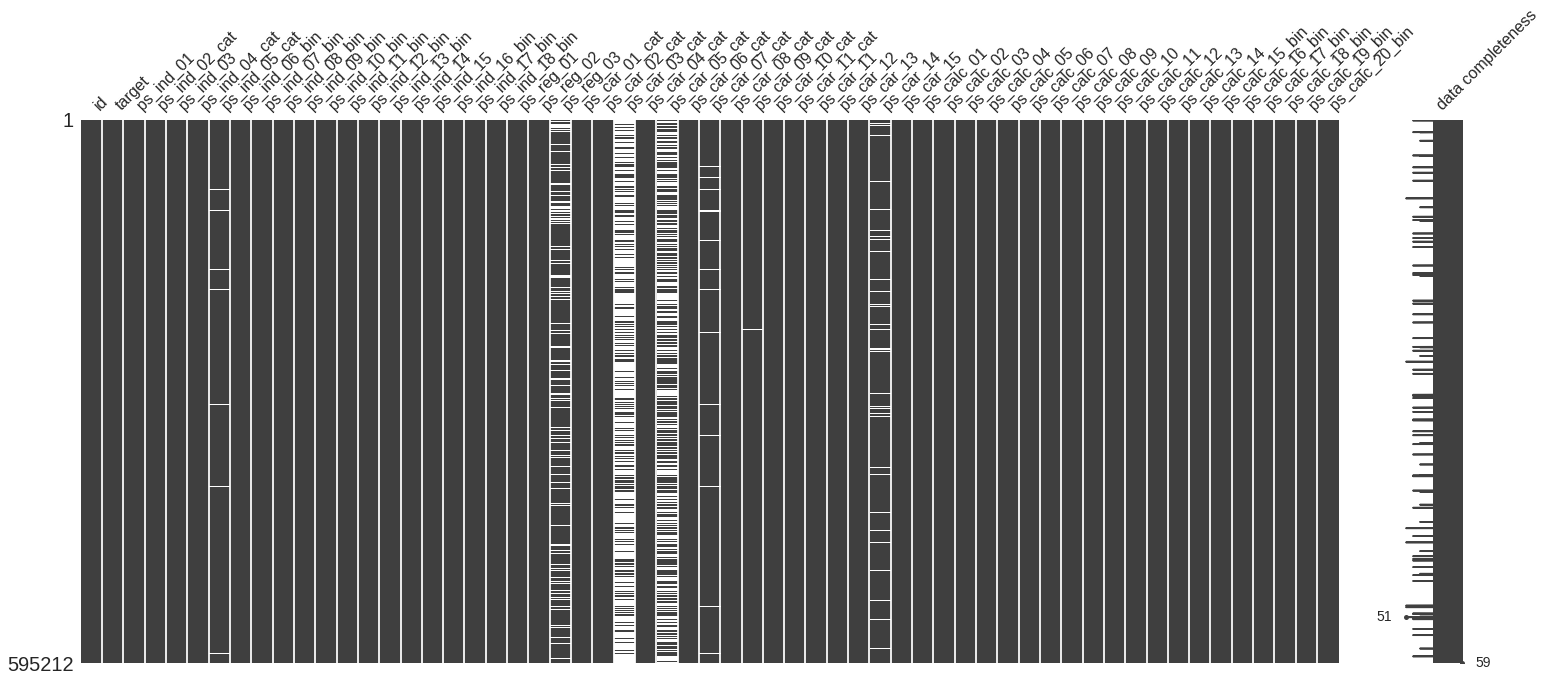

In [ ]:
import missingno

train_copy_1 = train.copy()
train_null_transform = train_copy_1.replace(-1, np.NaN) # -1을 NaN으로 변환합니다.

# 매트릭스 스타일입니다.
missingno.matrix(df=train_null_transform, labels=70)

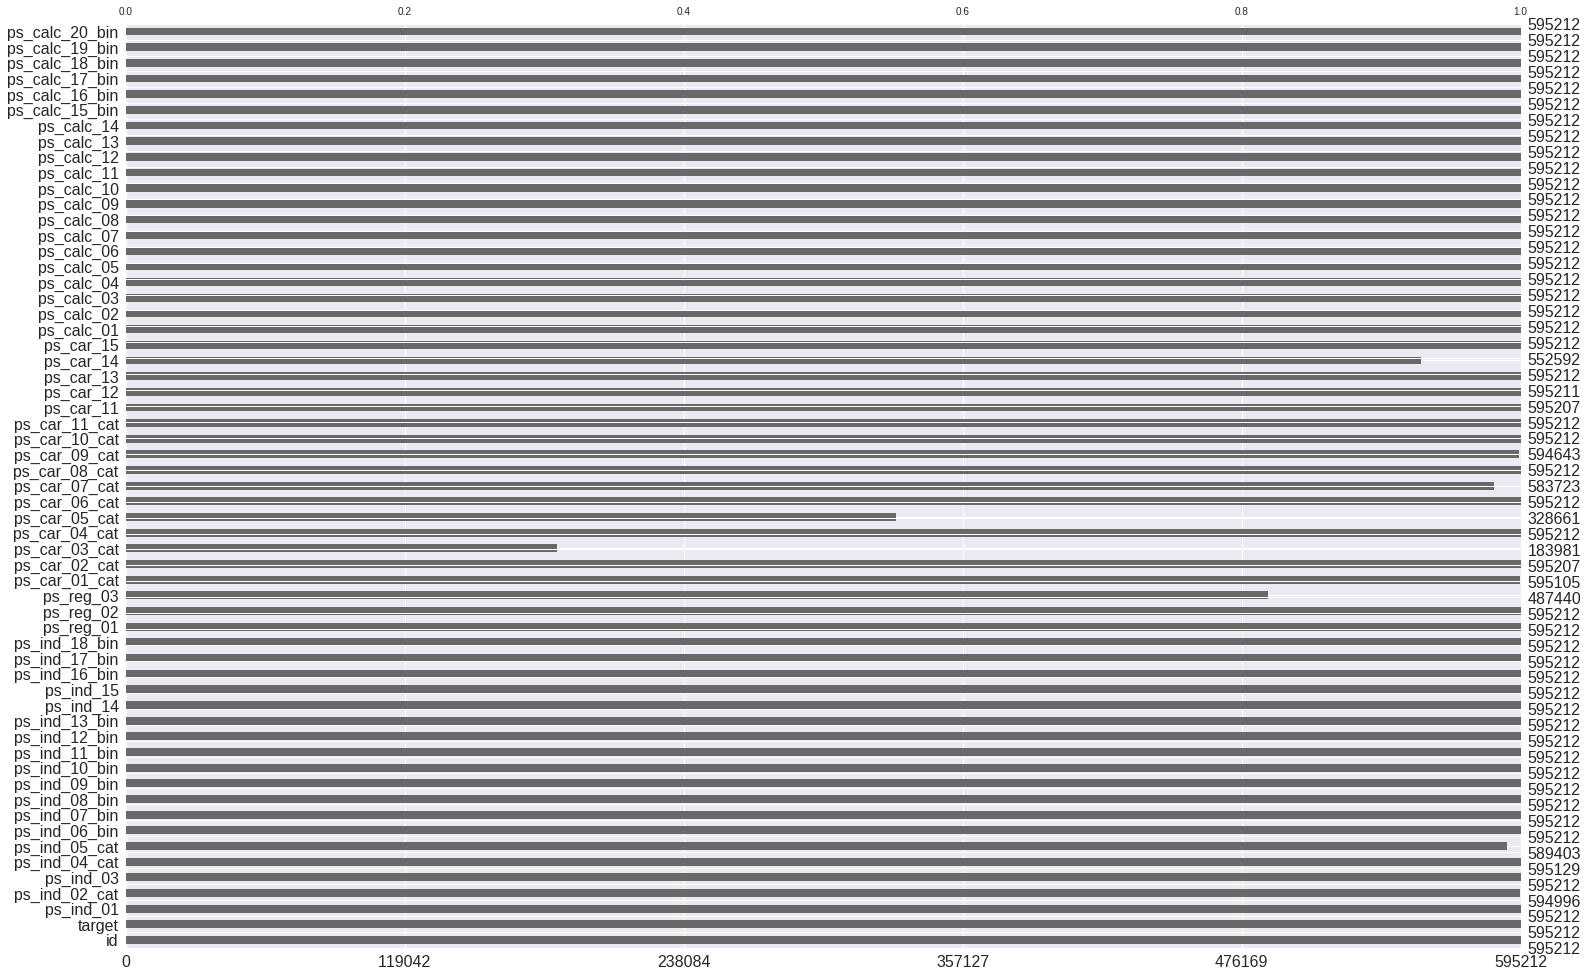

In [ ]:
# 막대그래프 스타일입니다.
missingno.bar(df=train_null_transform)

결측치는 평균값, 최빈값 등으로 적절히 처리하거나, 결측치 자체를 고윳값으로 간주할 수 있습니다.

### **2.2.2. target**

타깃값 분포를 확인해 보겠습니다.

In [ ]:
train['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
def crosstab_target(df, feature):
    result = pd.crosstab(index=df[feature], columns=df['target'], margins=True, normalize=True) * 100

    return result

In [ ]:
crosstab_target(train, 'target')

target,0,1,All
target,,,
0,96.355248,0.000000,96.355248
1,0.000000,3.644752,3.644752
All,96.355248,3.644752,100.000000


Text(0.5, 1.0, 'Distribution of target')

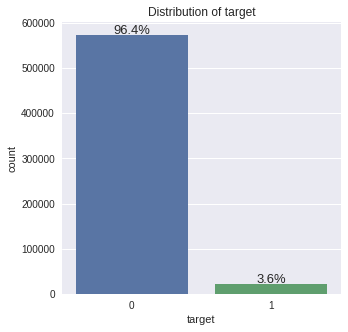

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grsp # 한 공간에 그래프를 그릴 수 있는 모듈을 읽습니다.
import seaborn as sns
%matplotlib inline

mpl.rc('font', size=13) # 글자 사이즈를 지정합니다.
plt.style.use('seaborn') # 시각화 스타일을 지정합니다.

# 그래프 도형 상단에 비율을 나타내는 함수를 선언합니다.
# `axis`는 행렬상 그래프 위치, `data_volume`은 데이터 크기입니다.
def have_ratio(axis, data_volume):
    for patch in axis.patches: # `patches`는 각 그래프의 도형 객체입니다.
        height = patch.get_height() # 도형의 높이(=데이터 개수)를 추출합니다.
        width = patch.get_width() # 도형의 너비(=x축 길이)를 추출합니다.
        left_corner_point = patch.get_x() # 도형의 왼쪽 하단 모서리의 x위치를 추출합니다.
        ratio = (height/data_volume) * 100 # 전체 데이터를 값 개수로 나누고 100을 곱하여 비율을 산출합니다.

        # 비율을 명시할 위치 및 비율 형태를 지정합니다.
        # x축 위치: 도형의 왼쪽 하단 모서리 x위치에 너비를 더하고 2로 나누어 중간 지점을 도출합니다.
        # y축 위치: 도형의 높이에 '데이터 개수 * 0.003'을 더하여 도형 바로 윗지점을 도출합니다.
        # 데이터 개수를 지정하는 이유는 데이터 개수가 달라도 도형 위 지점을 알맞게 지정하기 위함입니다.
        axis.text(x=left_corner_point + (width/2), y=height + (data_volume * 0.003),
                s=f'{ratio:1.1f}%', ha='center') 
# 함수 끝

# 시각화합니다.
plt.figure(figsize=(5, 5))
axis = sns.countplot(x='target', data=train)
have_ratio(axis, len(train)) # 선언한 함수를 사용하여 비율을 표시합니다.
axis.set_title(f'Distribution of target')

타깃값 분포 차이가 매우 큽니다. 0의 비율이 1의 비율보다 월등히 높기 때문에 층화 K 폴드 방식을 채택해야 합니다. 분포 차이가 큰 경우 비율이 낮은 값을 예측하는 데 더욱 신중을 기해야 합니다. 특히 이 문제는 타깃값 1을 잘 예측하는 것이 핵심입니다. 타깃값 1에 대한 값의 분포를 중점으로 파악해야 할 것입니다.

### **2.2.3. 명목형(cat)**

각 피처의 유형별로 살펴보겠습니다. 먼저 피처 유형을 따로 분류하겠습니다.

In [ ]:
list_category =[]
list_bin = []
list_continuous = []
list_ordinal = []

for column in train.columns:
    if 'cat' in column:
        list_category.append(column)
    elif ('bin' in column) and (column != 'target'):
        list_bin.append(column)
    elif train[column].dtype == 'float64':
        list_continuous.append(column)
    elif (train[column].dtype == 'int64') and (column != 'id') and (column != 'target'):
        list_ordinal.append(column)

크로스탭을 적용해 보겠습니다. 

In [ ]:
list_category

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [ ]:
crosstab_target(train, list_category[0])

target,0,1,All
ps_ind_02_cat,,,
-1,0.029569,0.006720,0.036290
1,69.963475,2.592018,72.555493
2,19.969355,0.791819,20.761174
3,4.559216,0.176240,4.735456
4,1.833632,0.077955,1.911588
All,96.355248,3.644752,100.000000


기실 총 개수보다 더 중요한 것은 타깃값 1에 대한 고윳값의 평균 비율입니다. 이 비율에 따라 특정 피처가 예측에 도움이 되는 피처인지 판단할 수 있습니다. 타깃값 1에 대한 고윳값의 평균 비율을 그래프로 파악해 보겠습니다.

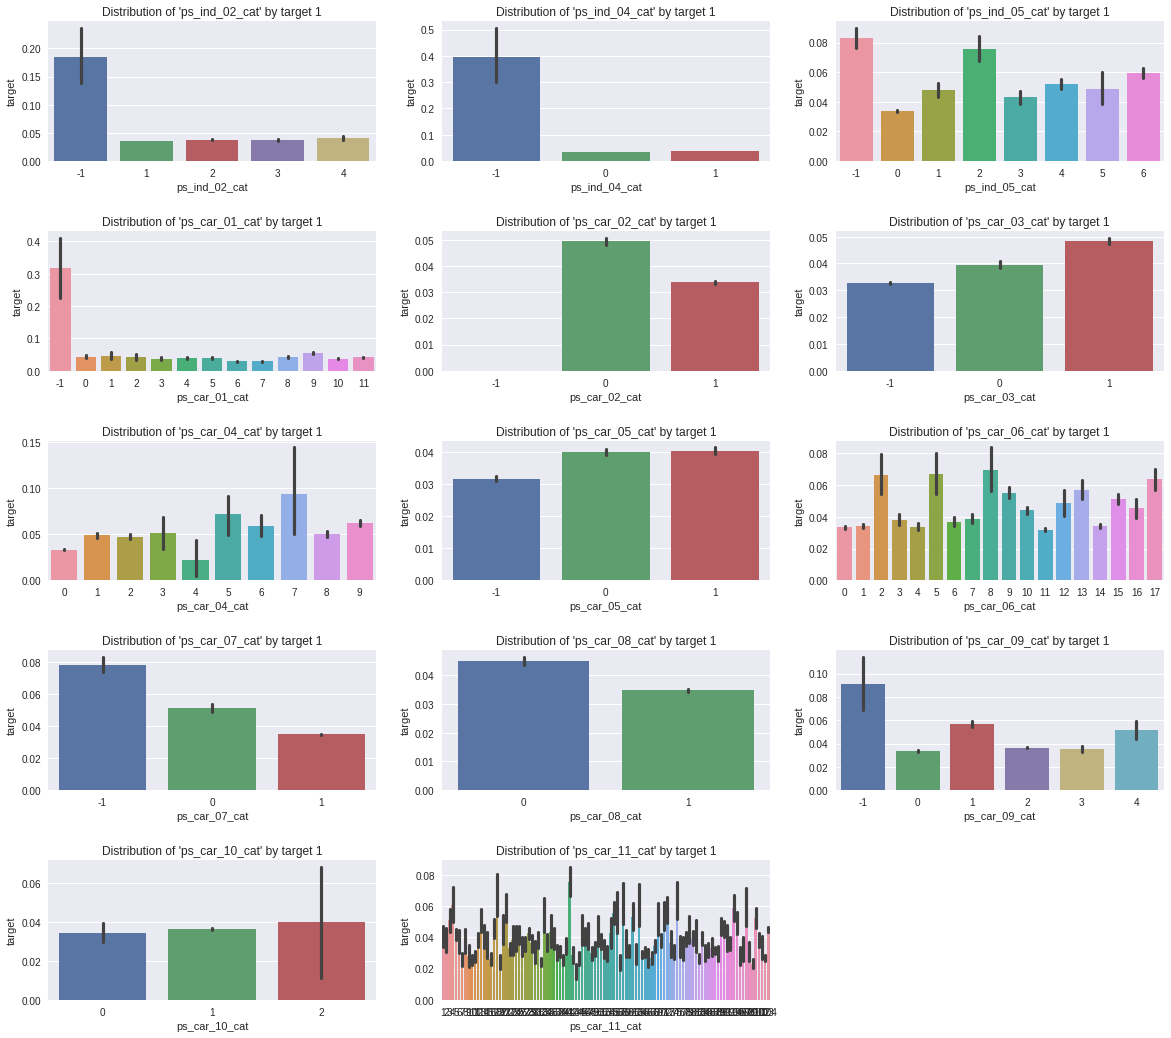

In [ ]:
grid = grsp.GridSpec(5, 3) # 그리드 형태의 행, 열을 지정합니다.
plt.figure(figsize=(20, 18))
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 좌우 여백을 지정합니다.

for index, feature in enumerate(list_category):
    axis = plt.subplot(grid[index]) # 그래프 축을 지정합니다.
    sns.barplot(x=feature, y='target', data=train, ax=axis) # 선언한 함수를 사용하여 비율을 표시합니다.
    axis.set_title(f'Distribution of \'{feature}\' by target 1')

- 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_car_01_cat': 결측치의 비율이 높고 신뢰구간이 넓습니다. 다른 고윳값들의 비율은 신뢰구간은 좁지만 비율 차이가 거의 나지 않습니다. 아울러 결측치의 비율이 다른 고윳값들에 비해 매우 높습니다. 선택지는 두 가지입니다. 첫째, 피처를 제거합니다. 둘째, 결측치를 최빈값으로 대체하거나 고윳값으로 간주하여 피처를 사용합니다. 후자의 경우에서 결측치를 고윳값으로 간주한다면 결측치의 신뢰하한점과 다른 고윳값들의 신뢰상한점 간 간격이 넓으므로 고윳값 간 차이가 커져 통계적 유의성이 확보됩니다.

- 'ps_car_10_cat': 고윳값의 비율이 비슷한 형태입니다. 더욱이 고윳값 2는 신뢰구간이 매우 넓습니다. 다만 이 자체만 가지고 통계적으로 유의한지 판단 내리기는 어렵습니다. 신뢰구간에 따라 고윳값 비율이 다를 수 있기 때문입니다. 따라서 피처를 사용하거나 제거하는 두 가지 방안 모두를 취할 수 있습니다. 참고로 데이터가 가진 피처는 최대한 예측에 활용하는 것이 성능 향상에 도움이 된다는 의견이 많습니다. 물론 필요한 경우라면 피처를 과감히 제거해야 성능이 향상됩니다.

이외 피처들은 모두 통계적으로 유의하고 타깃값 예측력이 존재합니다. 결측치가 존재하는 피처는 최빈값으로 대체하거나 고윳값으로 간주할 수 있습니다.

정리하자면, 반드시 제거해야 할 피처는 없습니다. 제거 여부에 따라 성능 차이가 발생할 가능성이 있는 피처는 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_car_01_cat', 'ps_car_10_cat'입니다. 모델링 과정에서 여러 시도를 해야 할 것입니다.

이번엔 상관관계를 파악해 보겠습니다. 사실 상관관계는 머신러닝 분야에서 크게 중요하진 않습니다. 상관관계보다 훨씬 중요한 것은 피처 중요도입니다. 상관계수가 낮은 피처라도 타깃값 예측에 중요한 역할을 할 수 있기 때문입니다. 참고로 피처에 결측치가 존재하면 상관관계가 왜곡될 수 있습니다. 상관관계를 구하기 전 반드시 결측치를 제거하는 것이 좋습니다. -1로 채워진 결측치를 NaN 값으로 변경하여 제거하고 히트맵을 그리겠습니다. 각 유형 피처마다 동일한 방식을 적용하겠습니다.

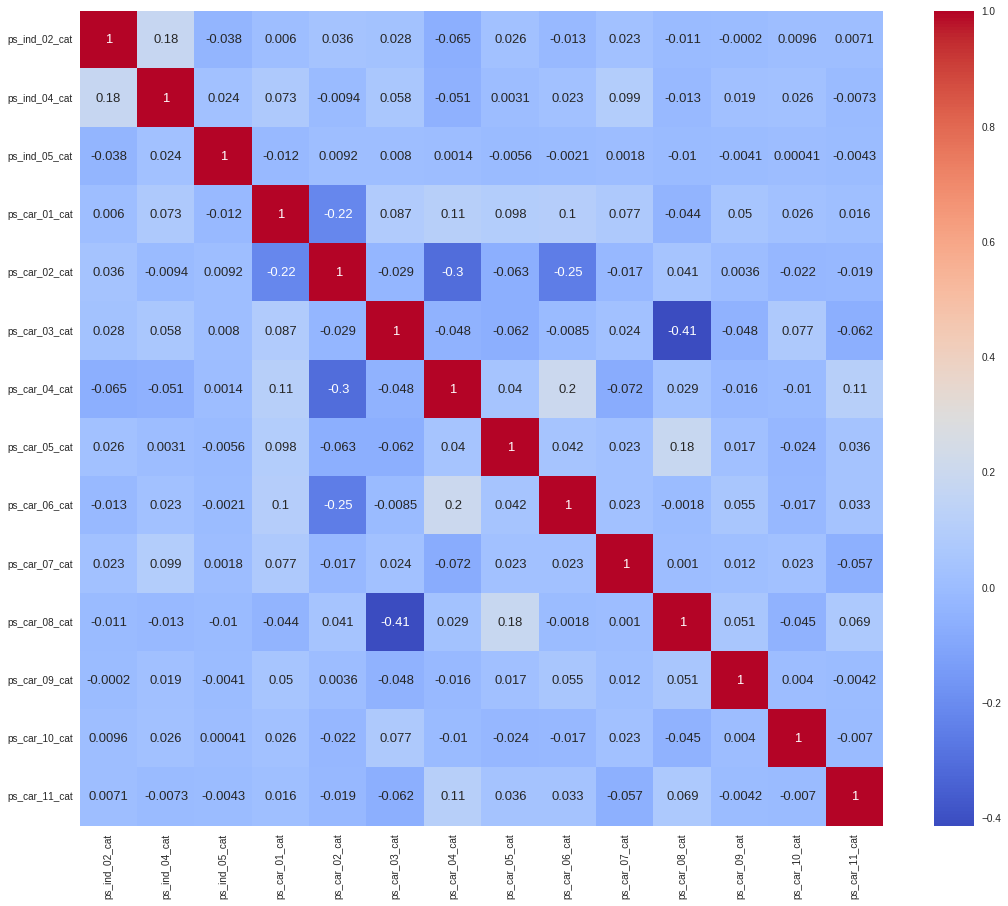

In [ ]:
train_copy_1 = train.copy()
train_null_transform = train_copy_1.replace(-1, np.NaN)
train_null_delete = train_null_transform.dropna()

plt.figure(figsize=(18, 15))
sns.heatmap(train_null_delete[list_category].corr(), annot=True, cmap='coolwarm')

상관계수가 지나치게 크거나 작은 피처는 존재하지 않습니다.

### **2.2.4. 이진형(bin)**

In [ ]:
len(list_bin)

17

막대그래프를 그리는 함수를 선언하여 이진형, 순서형 피처 파트에서 간편하게 사용하겠습니다. 참고로 연속형 피처 파트에서는 구간 세분화 작업이 필요하므로 이 함수를 적용할 수 없습니다.

In [ ]:
def barplot_feature_distribution_by_target(df, list_feature, number_rows, number_columns, fig_size=(20, 18)):
    grid = grsp.GridSpec(number_rows, number_columns)
    plt.figure(figsize=fig_size)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)

    for index, feature in enumerate(list_feature):
        axis = plt.subplot(grid[index])
        sns.barplot(x=feature, y='target', data=df, ax=axis)
        axis.set_title(f'Distribution of \'{feature}\' by target 1')

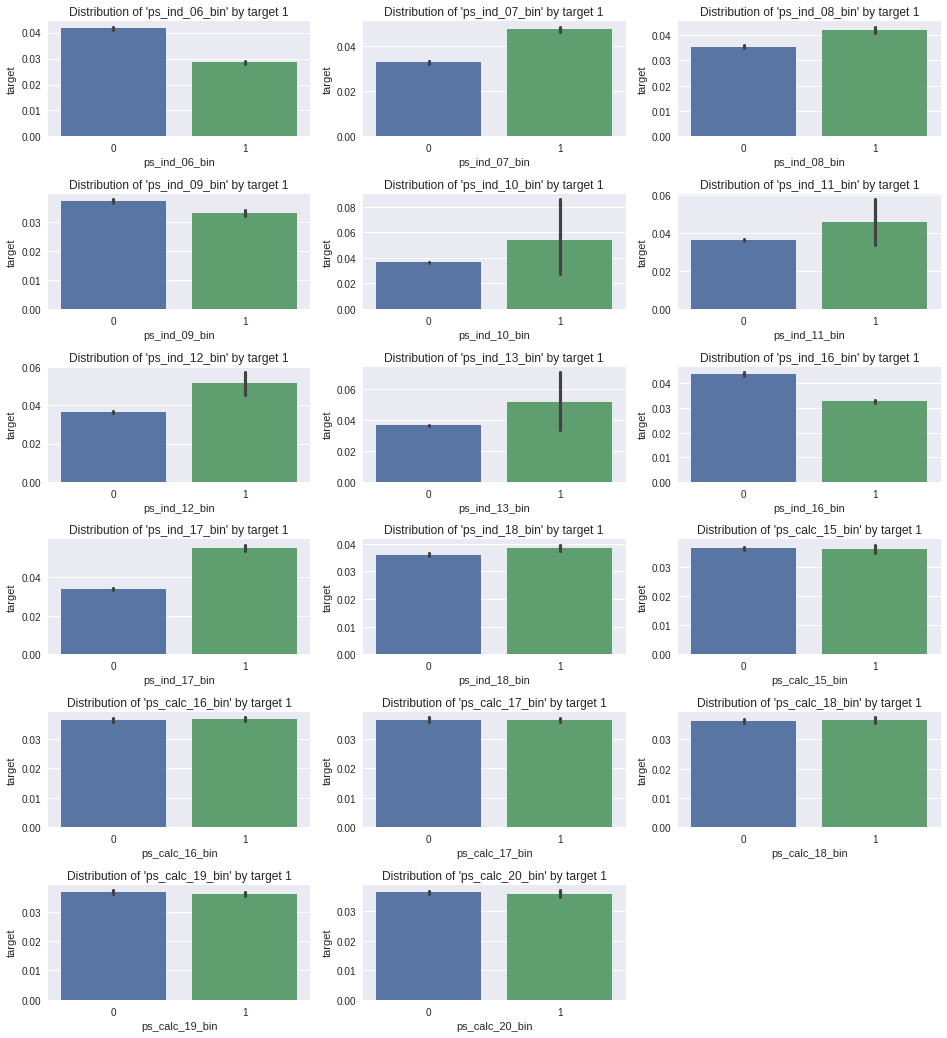

In [ ]:
barplot_feature_distribution_by_target(df=train, list_feature=list_bin,
                                       number_rows=6, number_columns=3, fig_size=(16, 18))

- 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_13_bin': 신뢰구간이 넓기 때문에 통계적으로 유의하지 않습니다. 물론 명목형 피처인 'ps_car_10_cat'처럼 신뢰구간에 따라 고윳값의 비율 차이가 발생할 수 있습니다. 피처를 사용하거나 제거하는 두 가지 방안 모두를 취할 수 있습니다.

- 'ps_calc_15 ~ 20_bin': 고윳값마다 비율 차이가 거의 없습니다. 타깃값 예측력이 매우 적다고 판단합니다. 피처를 제거해야 합니다.

결론적으로 반드시 제거해야 할 피처는 'ps_calc_15 ~ 20_bin'입니다. 제거를 고려해 볼 수 있는 피처는 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_13_bin'입니다.

히트맵을 그려 보겠습니다.

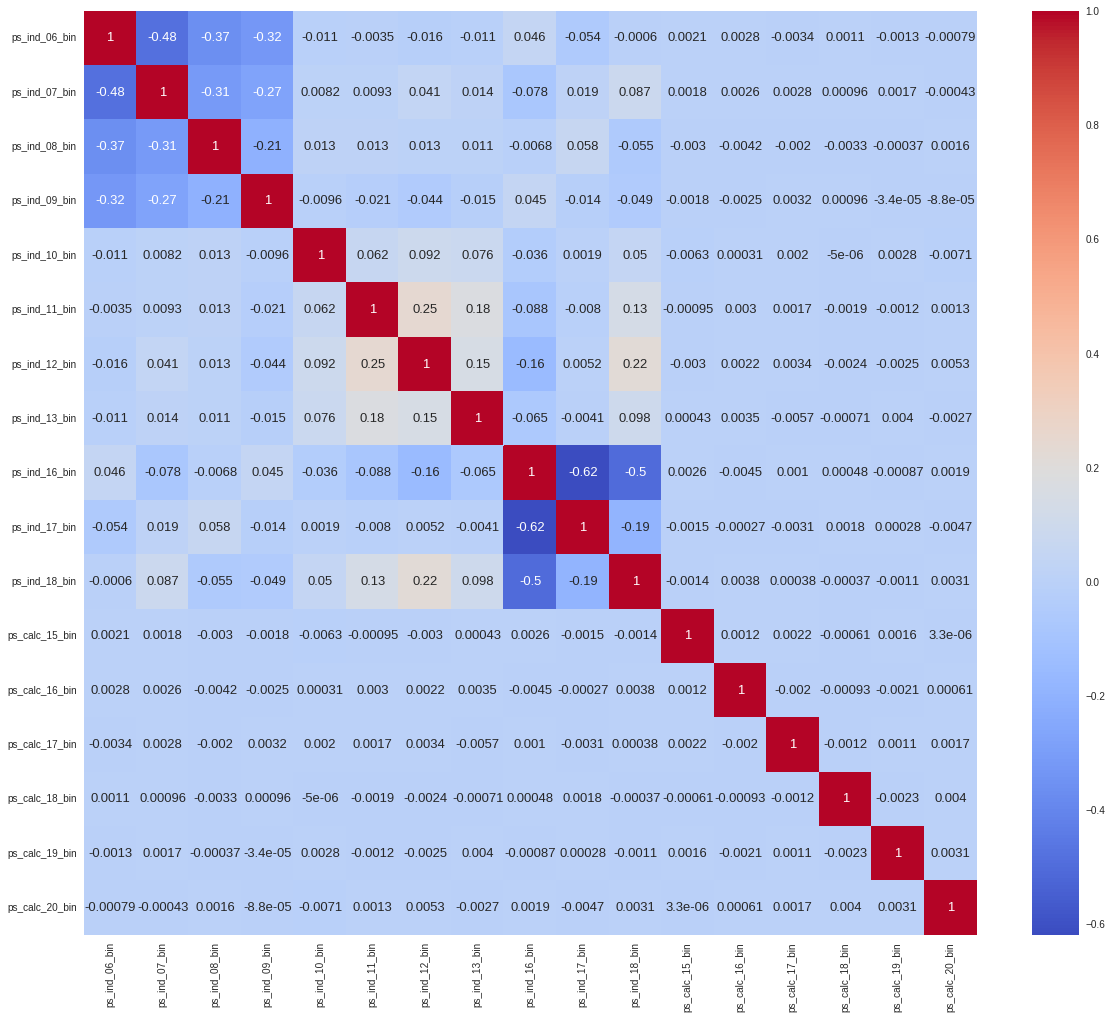

In [ ]:
plt.figure(figsize=(20, 17))
sns.heatmap(train_null_delete[list_bin].corr(), annot=True, cmap='coolwarm')

특이사항은 없습니다.

### **2.2.5. 연속형(float64)**

연속형 피처는 막대그래프를 그리기 전에 값을 구간으로 나눌 필요가 있습니다. 임의로 지정한 구간을 판다스의 `cut()` 메서드를 사용하여 분리하겠습니다.

In [ ]:
len(list_continuous)

10

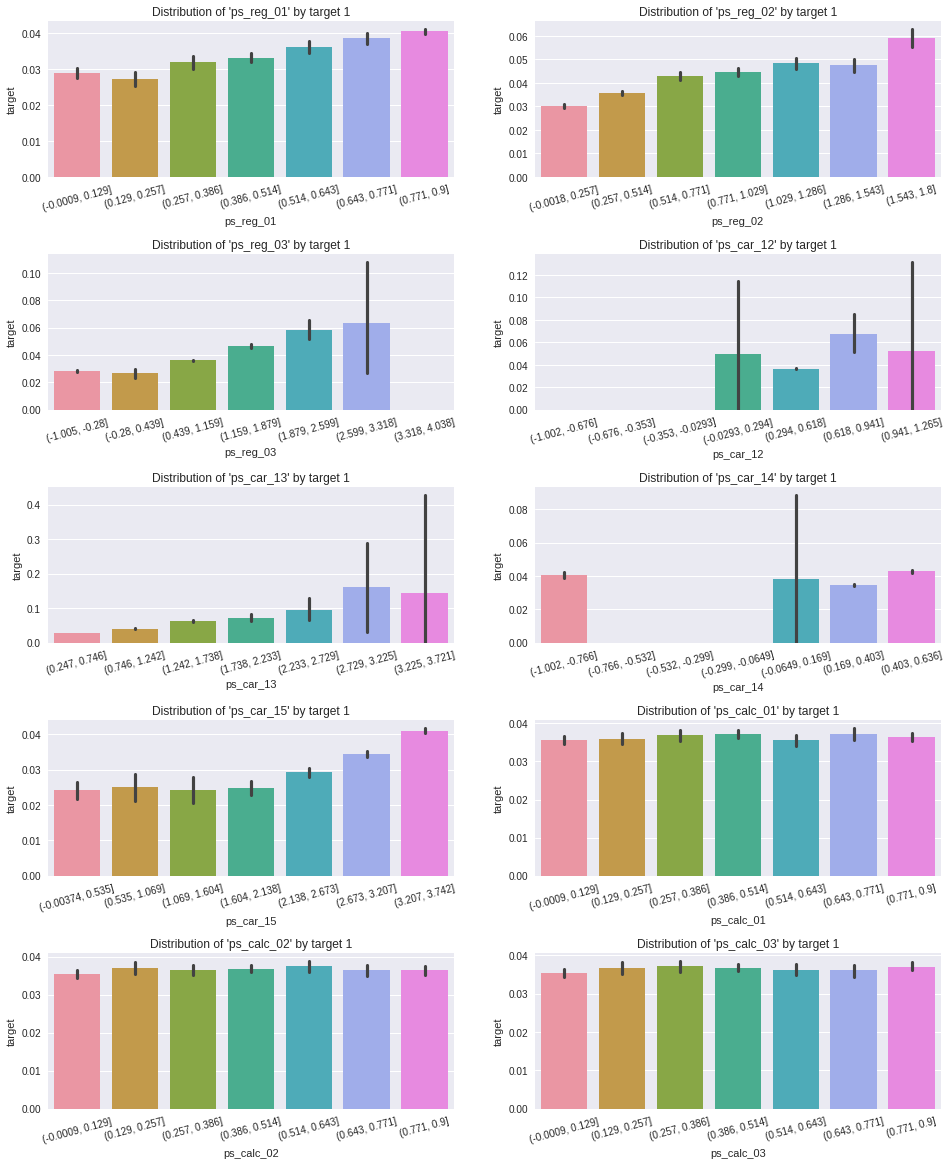

In [ ]:
grid = grsp.GridSpec(5, 2)
plt.figure(figsize=(16, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for index, feature in enumerate(list_continuous):
    train[feature] = pd.cut(train[feature], 7) # 연속형 피처를 일곱 구간으로 나눕니다.
    axis = plt.subplot(grid[index])
    sns.barplot(x=feature, y='target', data=train, ax=axis)
    axis.set_title(f'Distribution of \'{feature}\' by target 1')
    axis.tick_params(axis='x', labelrotation=15)

- 'ps_reg_03', 'ps_car_12 ~ 14': 신뢰구간이 넓은 구간이 있지만 전체 구간의 비율 차이가 존재합니다. 통계적으로 유의하다는 판단을 내릴 수 있습니다.

- 'ps_car_01 ~ 03': 구간별 차이가 거의 존재하지 않습니다. 타깃값을 예측하는 데 불필요한 피처입니다. 

결론적으로 반드시 제거해야 할 피처는 'ps_car_01 ~ 03'입니다.

히트맵을 그려 보겠습니다.

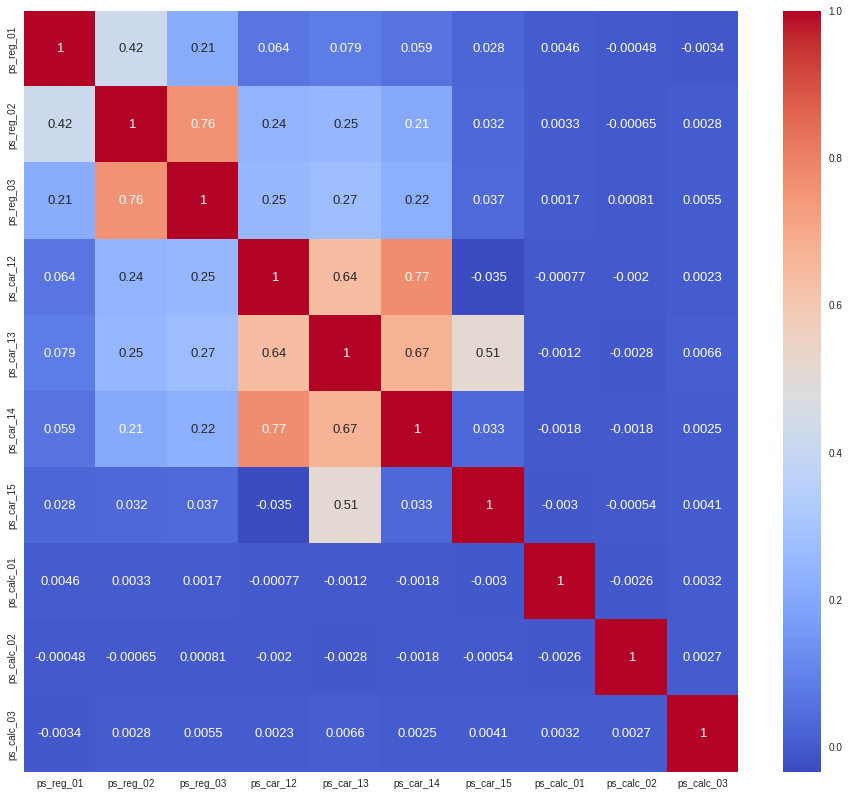

In [ ]:
train_copy_1 = train.copy()
train_null_transform = train_copy_1.replace(-1, np.NaN)
train_null_delete = train_null_transform.dropna()

plt.figure(figsize=(16, 14))
sns.heatmap(train_null_delete[list_continuous].corr(), annot=True, cmap='coolwarm')

상관계수가 제법 큰 피처가 보입니다. 매우 강한 편은 아니므로 굳이 삭제할 필요는 없어 보입니다. 

### **2.2.6. 순서형(int64)**

In [ ]:
len(list_ordinal)

16

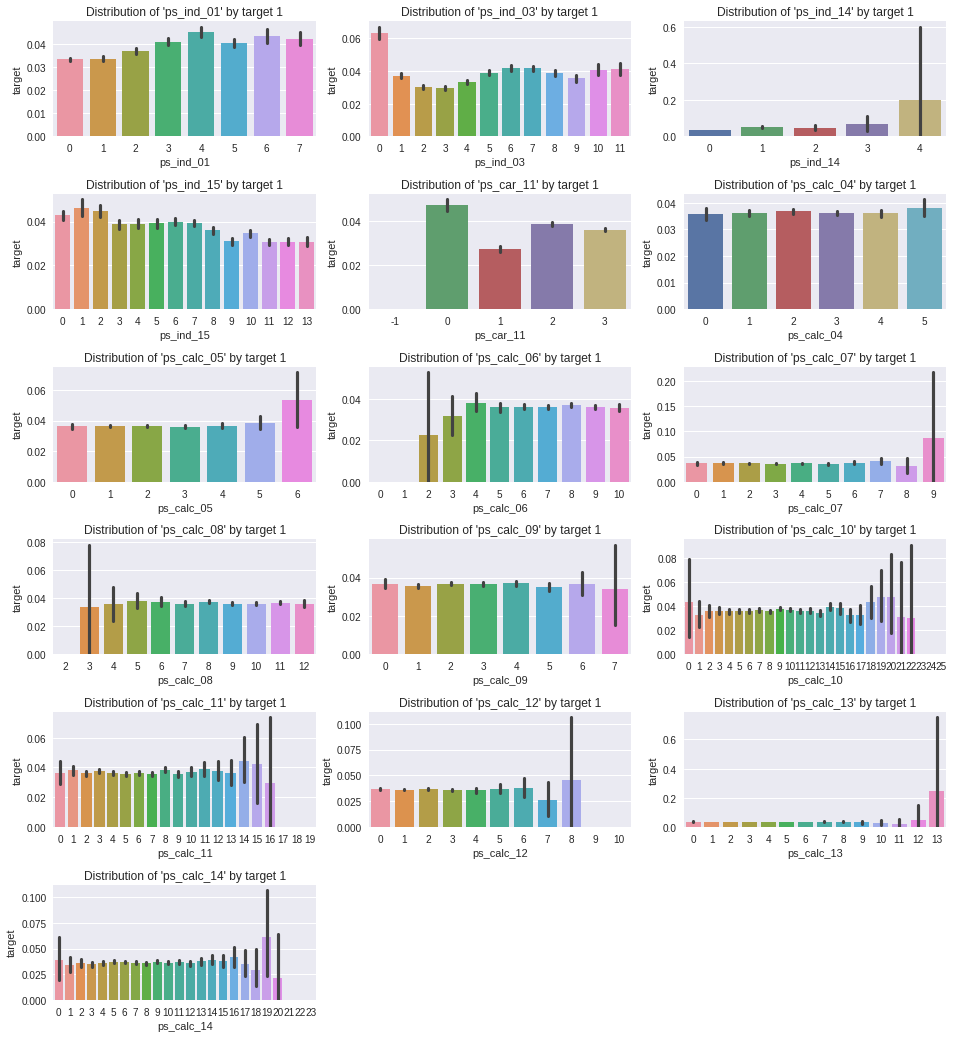

In [ ]:
barplot_feature_distribution_by_target(df=train, list_feature=list_ordinal,
                                       number_rows=6, number_columns=3, fig_size=(16, 18))

- 'ps_ind_14': 고윳값 비율이 다르지만 고윳값 4의 신뢰구간은 매우 넓습니다. 통계적 유의성이 부족해 보입니다. 다만 신뢰상한점이 높으므로 제거 여부를 확정하기는 어렵습니다.

- 'ps_calc_04': 고윳값 비율이 비슷합니다. 타깃값을 예측하는 데 도움이 되지 않습니다. 피처를 제거해야 합니다.

- 'ps_calc_05': 고윳값 6의 비율이 높지만 신뢰구간은 넓습니다. 통계적으로 유의하지 않습니다. 다만 신뢰상한점이 높으므로 타깃값 예측력이 존재할 가능성을 배제할 순 없습니다.

- 'ps_calc_06': 고윳값 비율이 다르지만 고윳값 2와 3의 신뢰구간은 넓습니다. 통계적 유의성이 떨어집니다. 물론 신뢰상한점이 높기 때문에 타깃값 예측력이 없다고 단정하긴 어렵습니다.

- 'ps_calc_07': 고윳값 비율이 비슷하고 고윳값 9의 신뢰구간은 매우 넓습니다. 통계적 유의성이 떨어집니다. 물론 신뢰상한점이 높기에 타깃값 예측력이 없다고 단정할 수 없습니다.

- 'ps_calc_08': 여러 고윳값의 비율이 비슷하지만 고윳값 3과 4의 신뢰구간은 넓습니다. 신뢰상한점이 높으므로 타깃값 예측력이 없다고 단정할 수 없습니다.

- 'ps_calc_09': 고윳값 비율이 비슷하고 고윳값 7의 신뢰구간은 넓습니다. 역시 타깃값 예측력이 부족하다고 단정할 수 없습니다.

- 'ps_calc_10 ~ 14': 고윳값 비율이 다르지만 신뢰구간은 넓습니다. 통계적 유의성은 부족해 보이지만 타깃값 예측력이 떨어진다고 판단할 수 없습니다. 

결론적으로 반드시 제거해야 할 피처는 'ps_calc_04'입니다. 신뢰구간이 넓은 피처들에 대한 제거 여부는 모델 성능에 따라 결정해야 할 것입니다.

히트맵을 그려 보겠습니다.

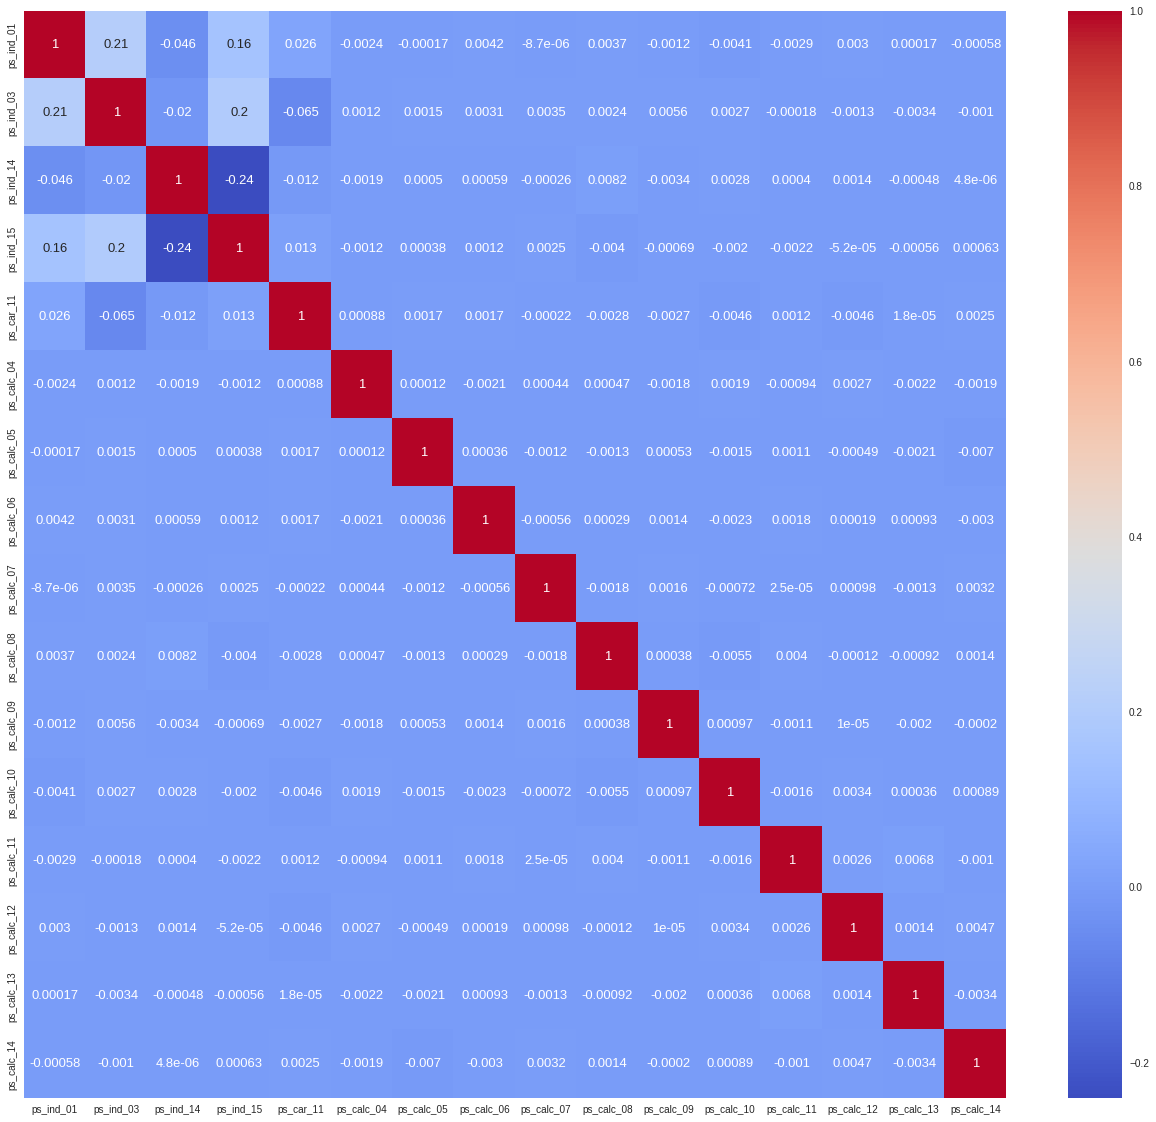

In [ ]:
train_copy_1 = train.copy()
train_null_transform = train_copy_1.replace(-1, np.NaN)
train_null_delete = train_null_transform.dropna()

plt.figure(figsize=(22, 20))
sns.heatmap(train_null_delete[list_ordinal].corr(), annot=True, cmap='coolwarm')

특이사항은 없습니다.

마지막으로 전체 피처에 대한 히트맵을 그려 보겠습니다.

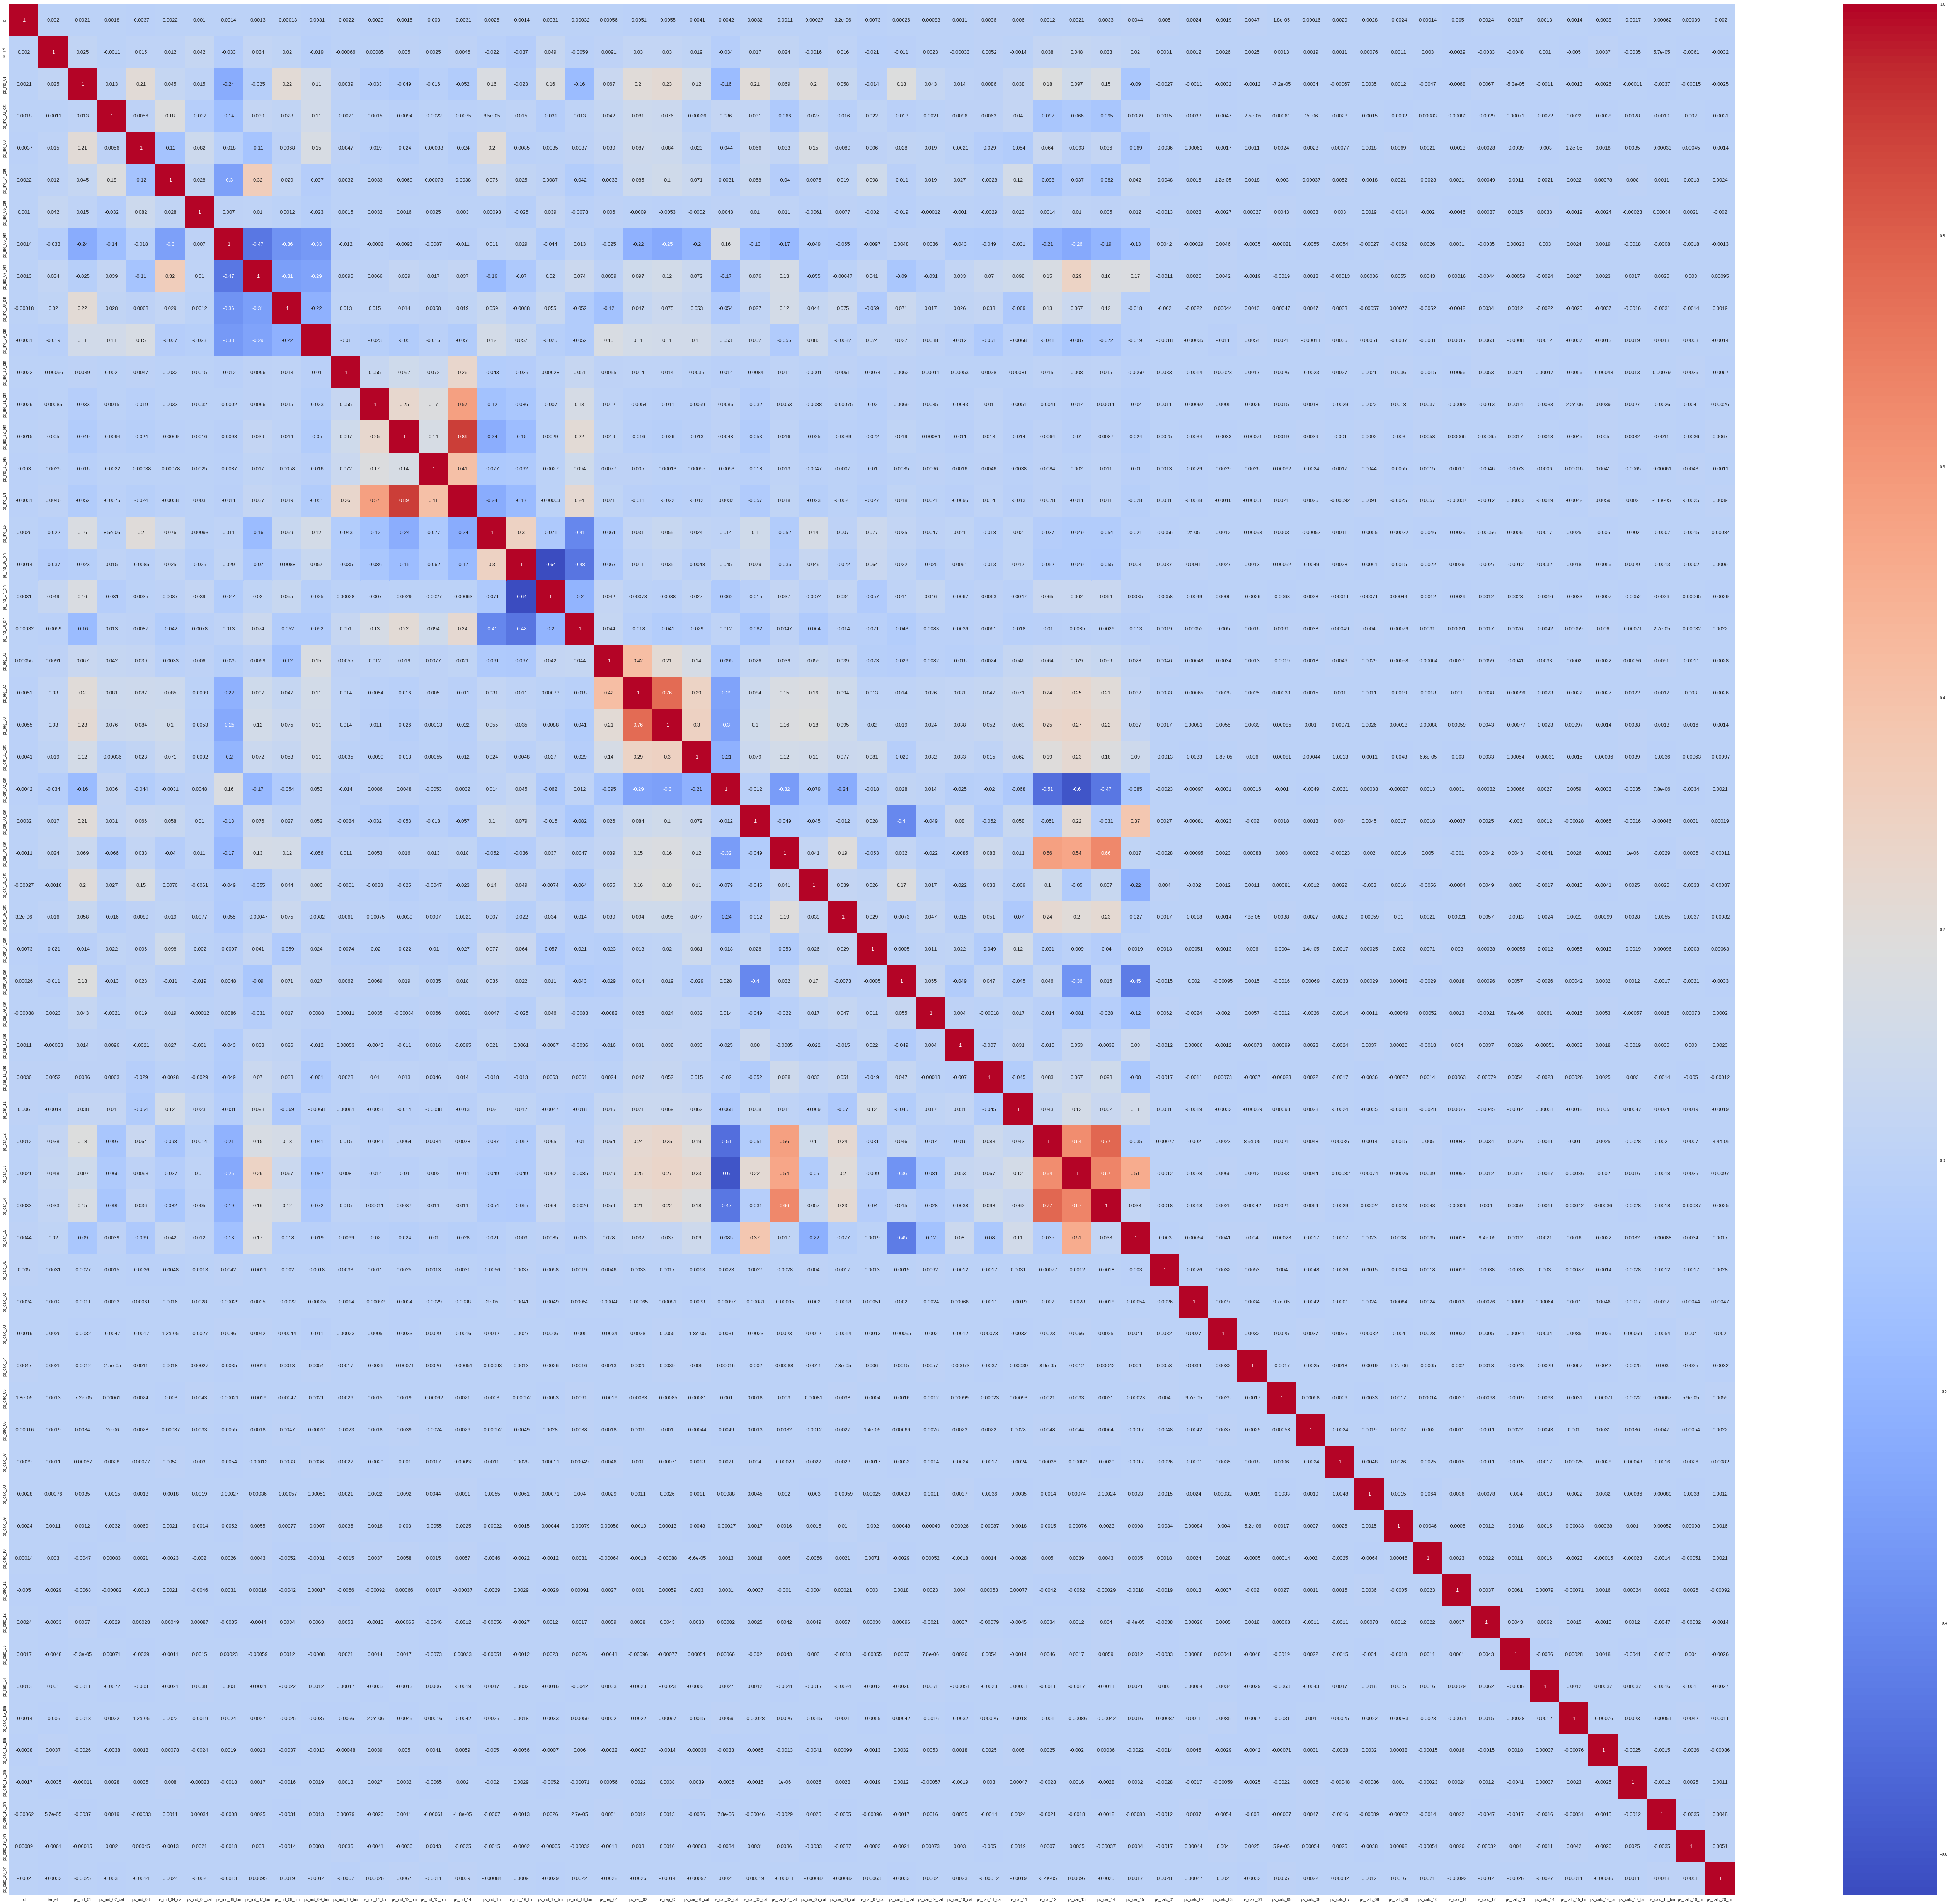

In [ ]:
train_copy_1 = train.copy()
train_null_transform = train_copy_1.replace(-1, np.NaN)
train_null_delete = train_null_transform.dropna()

plt.figure(figsize=(100, 90))
sns.heatmap(train_null_delete.corr(), annot=True, cmap='coolwarm')

상관 정도가 매우 높은 피처가 존재합니다. 이를 포착하여 굳이 제거할 필요는 없습니다. 반복하여 강조하지만 상관게수보다 중요한 건 피처 중요도 및 타깃값 예측력입니다. 물론 제거했을 때 성능이 미미하게 향상될 수도 있지만 오히려 떨어질 수도 있습니다. 이 때 성능이 크게 떨어질 가능성이 높습니다. 사용할 수 있는 피처는 최대한 사용해야 합니다.

# **3. 결론**

- 타깃 피처

  - 데이터 값이 불균형하므로 층화 K 폴드를 채택하여 균등한 비율로 검증해야 합니다.

- 명목형 피처

  - 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_car_01_cat', 'ps_car_10_cat': 피처를 제거하거나, 결측치인 -1을 고윳값으로 간주하여 예측에 사용할 수 있습니다.

  - 'ps_car_10_cat': 피처를 제거하거나 그대로 사용하는 방안 모두를 적용할 필요가 있습니다.

  - 모든 명목형 피처에 원-핫 인코딩을 적용해야 합니다.

- 이진형 피처

  - 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_13_bin': 신뢰구간이 넓으므로 피처를 제거하거나 예측에 사용하는 방안 모두를 고려해야 합니다.

  - 'ps_calc_15 ~ 20_bin': 고윳값마다 비율 차이가 거의 없으므로 피처를 제거해야 합니다.

- 연속형 피처

  - 'ps_carc_01 ~ 03': 구간별 차이가 거의 존재하지 않으므로 피처를 제거해야 합니다.


- 순서형 피처

  - 제거해야 할 피처는 아래와 같습니다.

    - 'ps_calc_04' : 고윳값 비율이 비슷합니다.

  - 제거하거나 사용할 피처는 아래와 같습니다.

    - 'ps_ind_14': 고윳값 비율이 다르지만 고윳값 4의 신뢰구간은 매우 넓습니다. 통계적 유의성이 부족해 보입니다. 다만 신뢰상한점이 높으므로 제거 여부를 확정하기는 어렵습니다.

    - 'ps_calc_05': 고윳값 6의 비율이 높지만 신뢰구간은 넓습니다. 통계적으로 유의하지 않습니다. 다만 신뢰상한점이 높으므로 타깃값 예측력이 존재할 가능성을 배제할 순 없습니다.

    - 'ps_calc_06': 고윳값 비율이 다르지만 고윳값 2와 3의 신뢰구간은 넓습니다. 통계적 유의성이 떨어집니다. 물론 신뢰상한점이 높기 때문에 타깃값 예측력이 없다고 단정하긴 어렵습니다.

    - 'ps_calc_07': 고윳값 비율이 비슷하고 고윳값 9의 신뢰구간은 매우 넓습니다. 통계적 유의성이 떨어집니다. 물론 신뢰상한점이 높기에 타깃값 예측력이 없다고 단정할 수 없습니다.

    - 'ps_calc_08': 여러 고윳값의 비율이 비슷하지만 고윳값 3과 4의 신뢰구간은 넓습니다. 신뢰상한점이 높으므로 타깃값 예측력이 없다고 단정할 수 없습니다.

    - 'ps_calc_09': 고윳값 비율이 비슷하고 고윳값 7의 신뢰구간은 넓습니다. 역시 타깃값 예측력이 부족하다고 단정할 수 없습니다.

    - 'ps_calc_10 ~ 14': 고윳값 비율이 다르지만 신뢰구간은 넓습니다. 통계적 유의성은 부족해 보이지만 타깃값 예측력이 떨어진다고 판단할 수 없습니다. 

  - 모든 순서형 피처에 min-max 정규화를 적용해야 합니다.
